In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot

In [2]:
'''
1. Import the CSV file and print out a few rows to examine the data
'''
# Load the CSV file
df = pd.read_csv('lab06_customers.csv')

# Print the first few rows to examine the data
print(df.head())

       race    income     sex  schoolYears   age   spend
0     white  157966.0    male         18.0  31.0  659.97
1     white   11134.0  female         14.0  50.0  719.69
2  hispanic  555369.0    male         14.0  32.0  854.61
3     white  272387.0  female         18.0  52.0  855.20
4     white  105459.0  female         17.0  49.0  758.33


In [3]:
'''
2. Compute descriptive statistics. This includes computing percentages of each category of the 
categorical variables. The function value_counts(normalize=True) will provide percentages.
If you don’t set normalize=True, that function will provide counts by category.
'''
# Compute descriptive statistics
print(df.describe())
print()

# Compute percentages of each category for categorical variables
#categorical variables: race, sex, schoolYears
categorical_variables = ['race', 'sex', 'schoolYears']  
for variable in categorical_variables:
    print(df[variable].value_counts(normalize=True))

             income   schoolYears           age         spend
count  1.000000e+04  10000.000000  10000.000000  10000.000000
mean   8.531690e+04     15.186000     41.982300    755.376206
std    1.096255e+05      2.225151      8.967498    115.994785
min    1.195000e+03      9.000000     18.000000    331.580000
25%    2.649025e+04     14.000000     34.000000    692.212500
50%    5.215300e+04     15.000000     42.000000    761.120000
75%    1.011165e+05     17.000000     50.000000    818.847500
max    2.100000e+06     22.000000     67.000000   1329.340000

white       0.5771
hispanic    0.1405
black       0.1163
other       0.1094
asian       0.0567
Name: race, dtype: float64
male      0.5006
female    0.4982
other     0.0012
Name: sex, dtype: float64
15.0    0.1576
14.0    0.1574
16.0    0.1511
17.0    0.1268
13.0    0.1171
18.0    0.0952
12.0    0.0776
19.0    0.0555
11.0    0.0359
20.0    0.0144
10.0    0.0080
21.0    0.0024
9.0     0.0009
22.0    0.0001
Name: schoolYears, dtype: float6

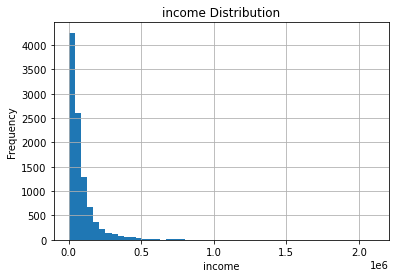

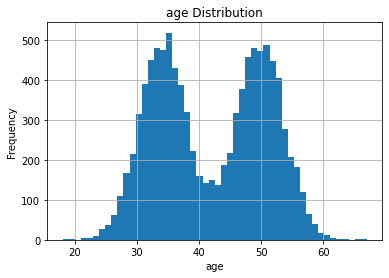

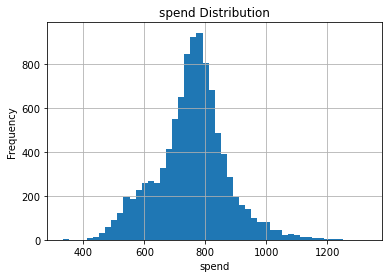

In [4]:
'''
3. Look at the distributions of the continuous variables. If income is not normal, choose an 
appropriate transformation.
'''
continuous_vars = ['income', 'age', 'spend']

for var in continuous_vars:
    plt.figure()
    df[var].hist(bins=50)
    plt.title(f'{var} Distribution')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

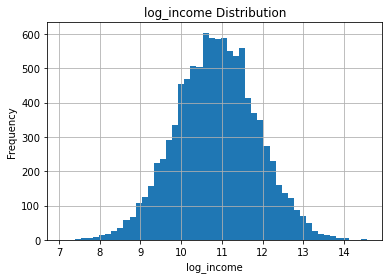

In [5]:
#Because income is not normal, consider using log transformations

df['log_income'] = np.log(df['income']+1)
plt.figure()
df['log_income'].hist(bins=50)
plt.title('log_income Distribution')
plt.xlabel('log_income')
plt.ylabel('Frequency')
plt.show()

In [6]:
'''
4. Compute average spending by race using groupby()
'''
average_spending_by_race = df.groupby('race')['spend'].mean()
print(average_spending_by_race)


race
asian       809.523739
black       643.611900
hispanic    824.047573
other       749.296161
white       757.013450
Name: spend, dtype: float64


In [7]:
'''
5. Compute average spending by sex.
'''
average_spending_by_sex = df.groupby('sex')['spend'].mean()
print(average_spending_by_sex)


sex
female    752.957477
male      758.359736
other     514.922500
Name: spend, dtype: float64


In [8]:
'''
6.a. Look at the overall p-value for the interaction using anova_lm() and Type III sums of 
squares. Is it significant?
'''
model = ols('spend ~ race * sex', data=df).fit()

# Look at the overall p-value for the interaction
print(sm.stats.anova_lm(model, typ=3))


                 sum_sq      df             F        PR(>F)
Intercept  2.089632e+08     1.0  22809.838124  0.000000e+00
race       2.915947e+07     4.0    795.741432  0.000000e+00
sex        3.677527e+06     2.0    200.714237  3.446613e-86
race:sex   2.011607e+07     8.0    274.476667  0.000000e+00
Residual   9.148275e+07  9986.0           NaN           NaN


In [9]:
'''
6.b. Report p-values for this comparison and adjusted R^2from the model.
'''
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  spend   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     361.5
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:02:24   Log-Likelihood:                -59796.
No. Observations:               10000   AIC:                         1.196e+05
Df Residuals:                    9986   BIC:                         1.197e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [10]:
'''
6.c. Create a pivot table of mean spend by race and sex. This link shows how (scroll to the 
part on adding columns).
'''
pivot_table = df.pivot_table(values='spend', index='race', columns='sex', aggfunc='mean')
print(pivot_table)

sex           female        male      other
race                                       
asian     893.067481  737.758295        NaN
black     559.065377  733.230018  483.65000
hispanic  764.879042  885.757330  446.44500
other     769.271450  730.775694  550.92000
white     774.441770  740.205425  531.45125


In [11]:
'''
7. We also believe that education might interact with race and gender. Fit another model testing a 
3-way interaction with schoolYears. Is it significant? What is the adjusted R^2 value?
'''
model_3way_interaction = ols('spend ~ race * sex * schoolYears', data=df).fit()

# Check the significance of the interaction term and adjusted R-squared
print(sm.stats.anova_lm(model_3way_interaction, typ=3))
print(model_3way_interaction.summary())


                            sum_sq      df           F        PR(>F)
Intercept             1.385477e+06     1.0  155.574269  1.926574e-35
race                  3.917260e+05     4.0   10.996665  6.748245e-09
sex                   6.041301e+03     2.0    0.339187  7.123575e-01
race:sex              3.910901e+05     8.0    5.489407  6.120765e-07
schoolYears           2.149949e+05     1.0   24.141641  9.092680e-07
race:schoolYears      5.205996e+04     4.0    1.461444  2.110541e-01
sex:schoolYears       7.384208e+04     2.0    4.145839  1.585743e-02
race:sex:schoolYears  2.002383e+05     8.0    2.810578  4.121835e-03
Residual              8.883301e+07  9975.0         NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                  spend   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     

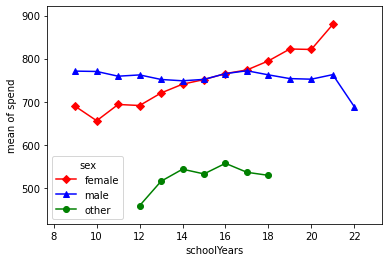

In [12]:
'''
8. Three-way interactions can be hard to explain. We will often visualize the components of them. 
Do an interaction plot with spend as the response, schoolYears on the x-axis, and sex as the 
trace using statsmodels interaction_plot
'''

interaction_plot(df['schoolYears'], df['sex'], df['spend'], xlabel='schoolYears', ylabel='spend', colors=['red', 'blue','green'], markers=['D', '^', 'o'])
plt.show()


In [13]:
'''
9. Of course, income and age probably play a factor in spending. Add those to the model and refit.
Are they significant and how do you interpret their coefficients? What is the new R2
?
'''
model_with_income_age = ols('spend ~ race * sex * schoolYears + log_income + age', data=df).fit()

# Check the significance of income and age, and interpret their coefficients
print(sm.stats.anova_lm(model_with_income_age, typ=3))
print(model_with_income_age.summary())


                            sum_sq      df             F        PR(>F)
Intercept             5.956168e+05     1.0    339.797432  1.217360e-74
race                  4.622835e+05     4.0     65.932809  3.870637e-55
sex                   1.826186e+05     2.0     52.091660  3.120538e-23
race:sex              4.539879e+05     8.0     32.374830  1.030177e-50
schoolYears           7.036847e+04     1.0     40.144981  2.459796e-10
race:schoolYears      2.945967e+04     4.0      4.201662  2.119251e-03
sex:schoolYears       3.919465e+04     2.0     11.180210  1.412315e-05
race:sex:schoolYears  1.757985e+05     8.0     12.536560  4.643179e-18
log_income            6.468928e+05     1.0    369.050223  8.590771e-81
age                   7.067118e+07     1.0  40317.676042  0.000000e+00
Residual              1.748126e+07  9973.0           NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                  spend   R-squared:                   